In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Turning off warning in ML
pd.options.mode.chained_assignment=None

In [2]:
# Loading and reading of dataset
advertise_df = pd.read_csv('Advertising.csv')

In [3]:
# Shape of the dataset
print('Number of rows = ',advertise_df.shape[0])
print('Number of columns = ',advertise_df.shape[1])

Number of rows =  200
Number of columns =  5


In [4]:
# Head of the dataset
advertise_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Info about the dataset
advertise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
# Describe 
advertise_df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
# Column names
advertise_df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Exploratory Data Analysis

In [8]:
sns.set_palette('GnBu_r')

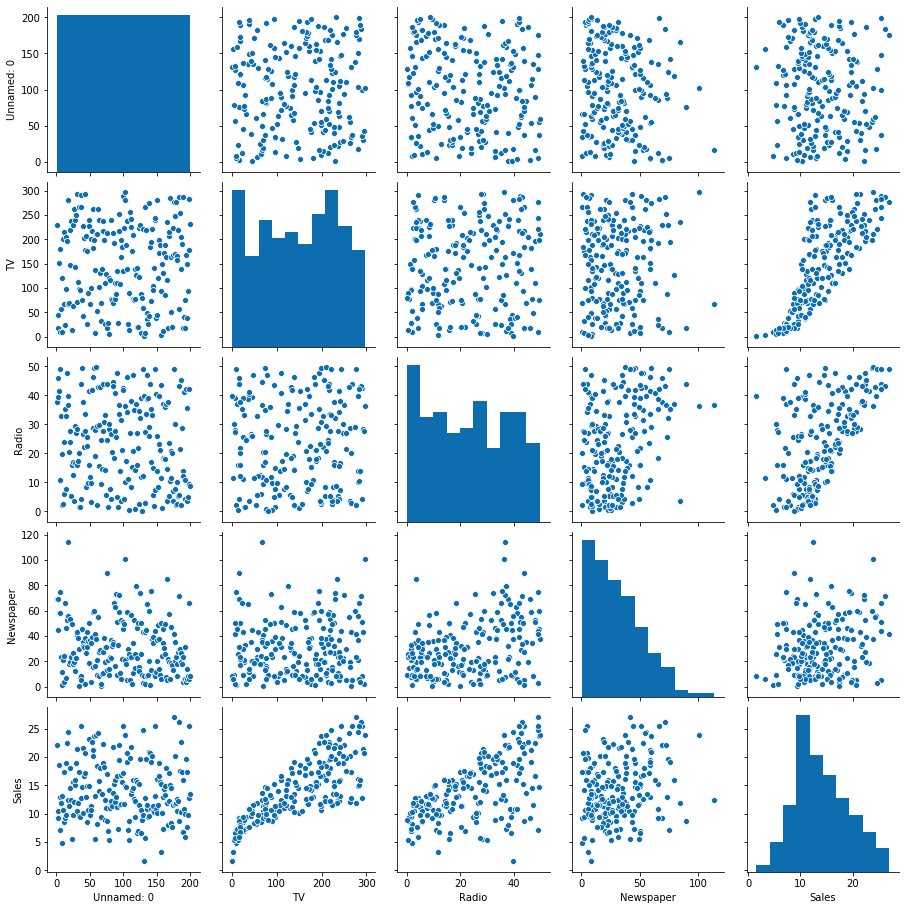

In [9]:
# Pair Plot 
sns.pairplot(advertise_df)

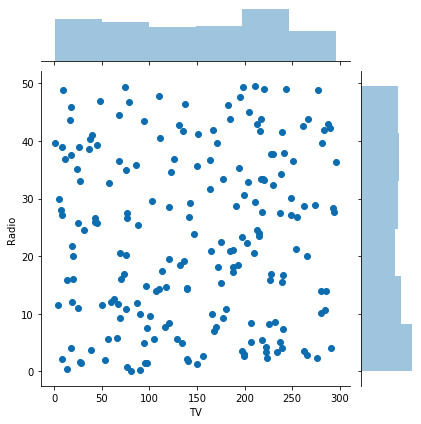

In [10]:
# joint Plot of TV and Radio
sns.jointplot(x='TV', y='Radio', data=advertise_df)

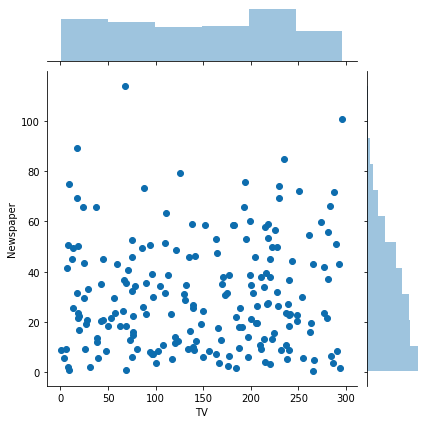

In [11]:
# joint Plot of TV and Newspaper
sns.jointplot(x='TV', y='Newspaper', data=advertise_df)

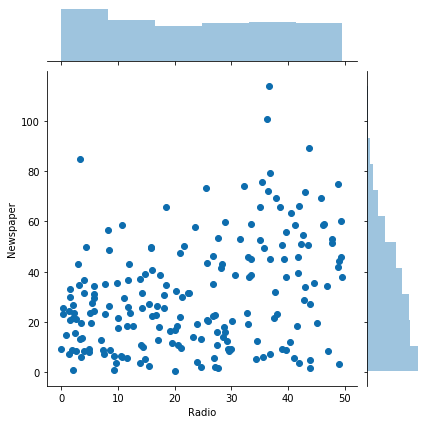

In [12]:
# joint Plot of Radio and Newspaper
sns.jointplot(x='Radio', y='Newspaper', data=advertise_df)

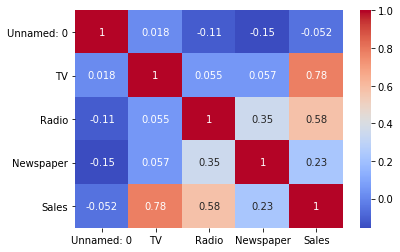

In [13]:
# Heat Map
sns.heatmap(advertise_df.corr(), annot=True, cmap='coolwarm')

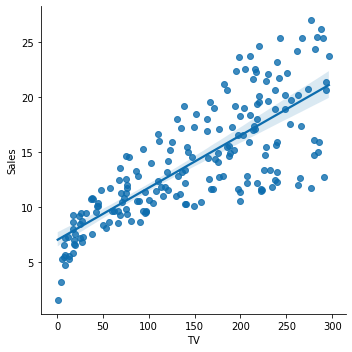

In [14]:
# Regression Plot of TV and Sales
sns.lmplot(x='TV', y='Sales', data=advertise_df)

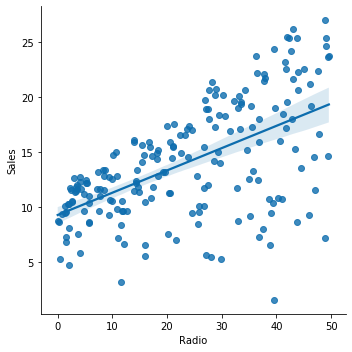

In [15]:
# Regression Plot of Radio and Sales
sns.lmplot(x='Radio', y='Sales', data=advertise_df)

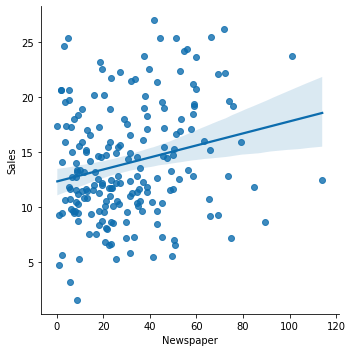

In [16]:
# Regression Plot of Newspaper and Sales
sns.lmplot(x='Newspaper', y='Sales', data=advertise_df)

In [17]:
# Split features to X and y
X = advertise_df[['TV', 'Radio', 'Newspaper']]
y = advertise_df['Sales']

In [18]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
# Create and Train Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Coefficient of the data
print('Coefficient =',model.coef_)

Coefficient = [ 0.04469599  0.1875657  -0.00032275]


In [21]:
# Predictions of the model
predictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

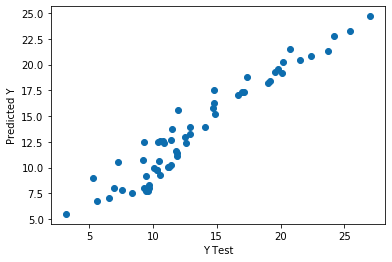

In [22]:
# Scatter Plot
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [23]:
# Regression Metric Library
from sklearn import metrics

# Mean Absolute Error
print('MAE = ',metrics.mean_absolute_error(y_test, predictions))

# Mean Squared Error
print('MSE = ',metrics.mean_squared_error(y_test, predictions))

# Root Mean Squared Error
print('RMSE = ',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE =  1.2137457736144808
MSE =  2.298716697886379
RMSE =  1.5161519375993882


In [24]:
# Variance Score
print('Variance_Score = ',metrics.explained_variance_score(y_test, predictions))

Variance_Score =  0.9197644826964831


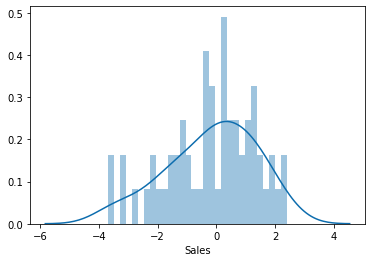

In [25]:
# Residual Displot
sns.distplot((y_test-predictions), bins=30)

In [26]:
# CDF
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
TV,0.044696
Radio,0.187566
Newspaper,-0.000323
